<a href="https://colab.research.google.com/github/DanaeMartinez01/Metodos-Numericos-/blob/main/PINS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polinomio de interpolación de Newton:
                  3        2                           
1.66666666666667⋅x  - 6.5⋅x  + 5.83333333333333⋅x + 1.0


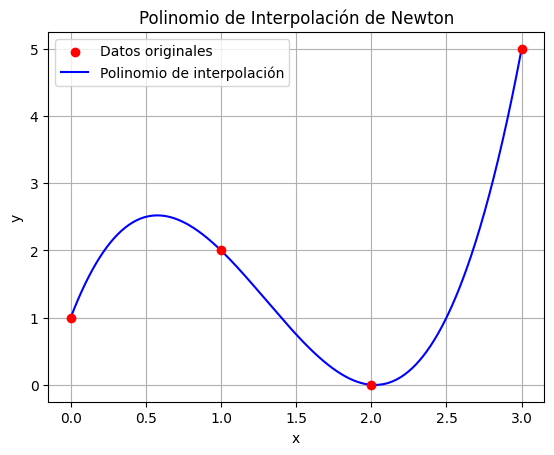

In [4]:
# Importar las bibliotecas necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def newton_interpolation(x_values, y_values):
    """
    Calcula el polinomio de interpolación de Newton para una tabla de datos igualmente espaciados.

    Args:
        x_values (list or array): Lista de valores x de los puntos.
        y_values (list or array): Lista de valores y de los puntos.

    Returns:
        sympy.Expr: El polinomio de interpolación de Newton.
    """
    # Definir el símbolo x para el polinomio
    x = sp.Symbol('x')

    # Número de puntos
    n = len(x_values)

    # Construcción de las diferencias divididas
    divided_diff = np.zeros((n, n))
    divided_diff[:, 0] = y_values  # Primera columna es igual a los valores de y

    for j in range(1, n):
        for i in range(n - j):
            divided_diff[i, j] = (divided_diff[i + 1, j - 1] - divided_diff[i, j - 1]) / (x_values[i + j] - x_values[i])

    # Construcción del polinomio de interpolación
    newton_poly = divided_diff[0, 0]
    for i in range(1, n):
        term = divided_diff[0, i]
        for j in range(i):
            term *= (x - x_values[j])
        newton_poly += term

    return sp.simplify(newton_poly)

def plot_newton_interpolation(x_values, y_values, newton_poly, num_points=500):
    """
    Grafica el polinomio de interpolación de Newton junto con los puntos originales.

    Args:
        x_values (list or array): Lista de valores x de los puntos.
        y_values (list or array): Lista de valores y de los puntos.
        newton_poly (sympy.Expr): Polinomio de interpolación de Newton.
        num_points (int): Número de puntos para graficar el polinomio.
    """
    # Convertir el polinomio a una función evaluable
    x = sp.Symbol('x')
    newton_func = sp.lambdify(x, newton_poly, modules='numpy')

    # Crear un rango de valores para graficar el polinomio
    x_range = np.linspace(min(x_values), max(x_values), num_points)
    y_range = newton_func(x_range)

    # Graficar los puntos originales
    plt.scatter(x_values, y_values, color='red', label='Datos originales', zorder=5)

    # Graficar el polinomio de interpolación
    plt.plot(x_range, y_range, color='blue', label='Polinomio de interpolación')

    # Personalizar el gráfico
    plt.title('Polinomio de Interpolación de Newton')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Código principal para probar la función
if __name__ == "__main__":
    # Datos de prueba
    x_vals = [0, 1, 2, 3]
    y_vals = [1, 2, 0, 5]

    # Calcular el polinomio de interpolación de Newton
    poly_newton = newton_interpolation(x_vals, y_vals)
    print("Polinomio de interpolación de Newton:")
    sp.pprint(poly_newton)

    # Graficar el polinomio
    plot_newton_interpolation(x_vals, y_vals, poly_newton)

Detalles del Código:
1.	Cálculo del polinomio:
	•	Se utiliza la fórmula del polinomio de interpolación de Newton, calculando las diferencias divididas en una matriz triangular.
	•	El polinomio se construye como una suma acumulativa de términos.
2.	Graficación:
	•	Los puntos originales se grafican como puntos rojos.
	•	El polinomio de interpolación se grafica como una línea azul suave.
3.	Documentación:
	•	Cada función tiene comentarios que explican los parámetros y lo que retorna.
	•	Se utilizan nombres descriptivos para mejorar la legibilidad del código.